# imports

In [2]:
import GeoLeoXtract as glx

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import nesdis_gml_synergy.satlab as ngs
# import nesdis_aws.nesdis_aws as naws

# Download data

## JPSS

There have been changes recently, one of which resulted in a mixup of data!! I hard-coded an error (AOD mixed ups with ADP) which will eventually need to be removed)

In [49]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf
import GeoLeoXtract.scrapers.jpss as ngsjpss
import cartopy

In [30]:
reload(glx.cloud_interface)

<module 'GeoLeoXtract.cloud_interface' from '/home/grad/htelg/prog_dev/GeoLeoXtract/GeoLeoXtract/cloud_interface.py'>

In [40]:
query = glx.cloud_interface.AwsQuery(path2folder_local='/home/grad/htelg/tmp/',
                            satellite='NOAA 20',
                            sensor = 'VIIRS',
                            product= 'AOD',
                            # scan_sector=None,
                            # start='2022-11-13 12:00:00',
                            # end='2022-11-14 13:00:00',
                            start='20200822 00:00:00',
                            end='20200822 23:59:59',
                            site = atmsrf.network.stations.Table_Mountain
                           )

In [41]:
query.workplan

,path2file_aws,path2file_local
overpass_datetime,,
2020-08-22 19:55:14.717470,noaa-nesdis-n20-pds/VIIRS-JRR-ADP/2020/08/22/J...,/home/grad/htelg/tmp/JRR-AOD_v3r0_j01_s2020082...
2020-08-22 19:55:14.717470,noaa-nesdis-n20-pds/VIIRS-JRR-ADP/2020/08/22/J...,/home/grad/htelg/tmp/JRR-AOD_v3r0_j01_s2020082...


In [42]:
query.download()

[None]

In [43]:
query.workplan.path2file_aws.iloc[0]

PosixPath('noaa-nesdis-n20-pds/VIIRS-JRR-ADP/2020/08/22/JRR-AOD_v3r0_j01_s202008221953118_e202008221954364_c202100000000000.nc')

In [44]:
query.workplan.path2file_local.iloc[0]

PosixPath('/home/grad/htelg/tmp/JRR-AOD_v3r0_j01_s202008221953118_e202008221954364_c202100000000000.nc')

In [45]:
si = glx.satlab.open_file(query.workplan.path2file_local.iloc[0], verbose=True)

product name: AEROSOL_AOD_EN
Found AEROSOL_AOD_EN version 3.0


In [58]:
si.data_by_quality_high

<xarray.Dataset> Size: 167MB
Dimensions:            (y: 768, x: 3200)
Coordinates:
    lat                (y, x) float32 10MB 39.25 39.25 39.25 ... 38.91 38.91
    lon                (y, x) float32 10MB -86.89 -86.91 ... -123.1 -123.1
Dimensions without coordinates: y, x
Data variables: (12/15)
    QCExtn             (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    QCTest             (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    QCInput            (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    QCPath             (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    QCRet              (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    FineMdlIdx         (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    ...                 ...
    AOD550             (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    AngsExp1           (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    AngsExp2           (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    SpaStdDev          (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    Residual           (y, x) float32 10MB nan nan nan nan ... nan nan nan nan
    CloudMaskQualFlag  (y, x) float32 10MB nan nan nan nan ... nan nan nan nan

In [60]:
si.grid_type

'lonlatmesh'

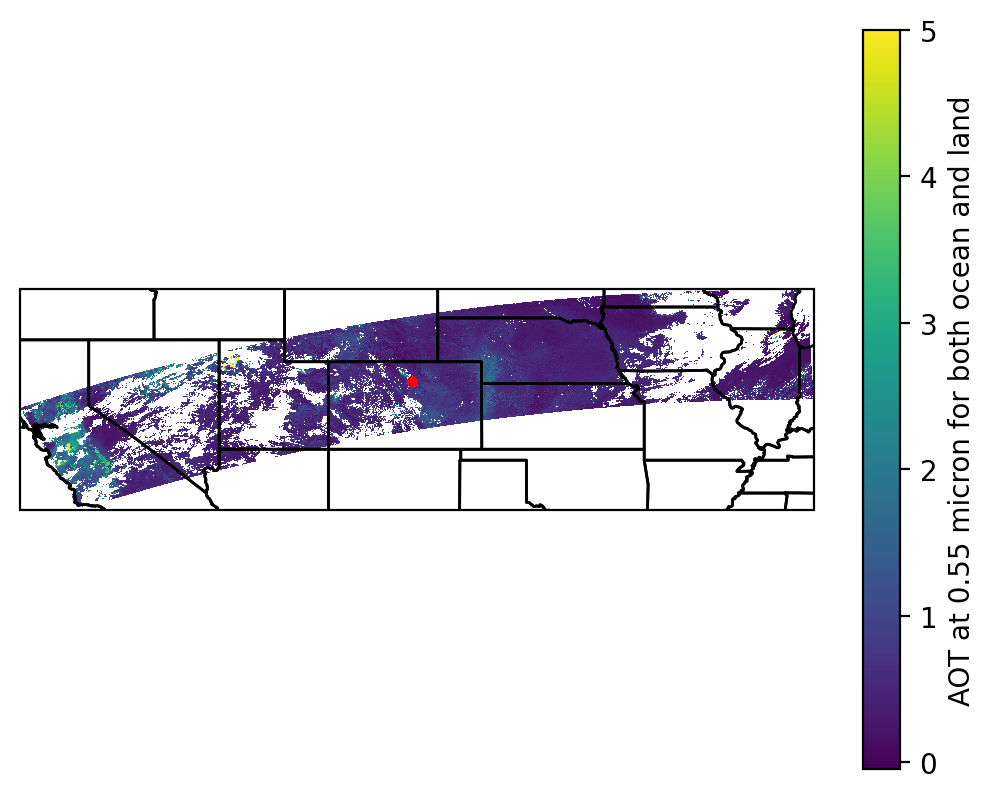

In [55]:
a,pc,cb= si.plot('AOD550')
site = atmsrf.network.stations.Table_Mountain
a.plot(site.lon, site.lat, transform = cartopy.crs.PlateCarree(), marker = '.', color = 'red')

In [52]:
a

<GeoAxes: >

In [47]:
si = glx.satlab.open_file(query.workplan.path2file_local.iloc[1], verbose=True)

product name: AEROSOL_AOD_EN
Found AEROSOL_AOD_EN version 3.0


(<GeoAxes: >,
 <matplotlib.colorbar.Colorbar at 0x7f1eb1fe5010>)

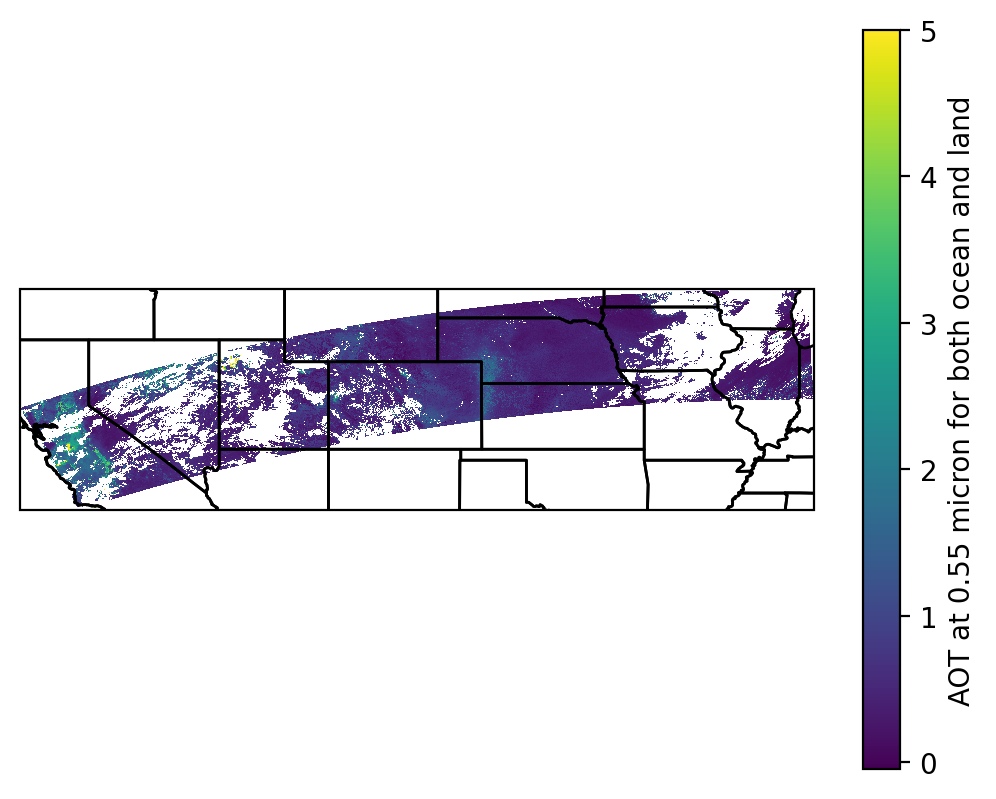

In [48]:
si.plot('AOD550', )

## GOES

There are two ways to download GOES data, which are very similar, well the second version uses the first version
1) AwsQuery: Check all data that is availab on the server (and not locally) in the designated time span
2) Donwload by chunk: This will break the desired time range into chuncks (eg. daily, or monthly) which are later concatinated (deletes the single files). Cecks if the concatinated data is available locally, if not it will us 1) to download the data within the chunk and concatinates it.

This change was necessary, as when you are looking for very long time ranges just looking what is available on the server (AWS) taks too long. Another benifit is that concatination happens on the fly, and storage is preserved when concat-input-files are deleted.

### AwsQuery

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
query = glx.cloud_interface.AwsQuery(path2folder_local='/home/grad/htelg/tmp',
                      satellite= 17, #16,
                      product=f'ABI-L2-LST',#f'ABI-L2-AOD',
                      scan_sector='C',
                      start='2021-06-28 21:00:00',#'2020-09-13 18:00:00',
                      end='2021-06-28 21:15:00',#'2020-09-13 18:15:00',
                      process=None,
                    )
query.workplan

,path2file_aws,path2file_local


In [13]:
query.download()

[None]

### AwsQueryChunked

In [3]:
import GeoLeoXtract as glx
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf


In [4]:
reload(glx)
reload(glx.scrapers)
reload(glx.cloud_interface)
reload(glx.scrapers.goes)

<module 'GeoLeoXtract.scrapers.goes' from '/home/grad/htelg/prog_dev/GeoLeoXtract/GeoLeoXtract/scrapers/goes.py'>

In [5]:
product = 'ABI_L2_AOD'
name = 'surfrad'
satellite = '16'
version = 1
p2fld_out = f'/nfs/stu3data2/Satellite_data/goes/{satellite}/{product}/projections/{name}/v{version:03d}/concat'
pattern = '{product}_projected2{name}_{date}.nc' #ABI_L2_AOD_projected2surfrad_20230813.nc
p2fld_tmp = '/home/grad/htelg/tmp/'
frequency = 'D'
start = '2020-01-01'
end = '2024-01-01'
stations = atmsrf.network.stations

scp = glx.scrapers.goes.GOESScraper(product=product,
                                      name=name,
                                      satellite=satellite,
                                      p2fld_out=p2fld_out,
                                      pattern=pattern,
                                      p2fld_tmp=p2fld_tmp,
                                      frequency=frequency,
                                      start=start,
                                      end=end,
                                    stations = stations,
                                    
                                    )

scp.workplan

,p2f_out
datetime,
2023-08-14,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-15,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-16,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-17,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-18,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
...,...
2023-12-28,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-12-29,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-12-30,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...


In [ ]:
scp.process(max_processes=10)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [166]:
def process_single_chunk(row):

    # cstart = row.name
    # cend = cstart + pd.to_timedelta(1,frequency)
    # cstart, cend
    
    query = glx.cloud_interface.AwsQuery(path2folder_local='/home/grad/htelg/tmp',
                          satellite= satellite, #16,
                          product=product.replace('_', '-'),
                          scan_sector='C',
                          start=cstart,
                          end=cend,
                          process=None,
                          overwrite=True,
                        )
    query.workplan
    
    query.download()
    
    # generate the path with the projected files
    
    # query.workplan['path2file_local_projected'] = query.workplan.apply(lambda qrow: qrow.path2file_local.parent.joinpath(qrow.path2file_local.name.replace('.nc', '_projected.nc')), axis = 1)
    
    #query.workplan
    
    # query.workplan = query.workplan.iloc[:2]
    
    # process all downloaded files
    projections = []
    for idx, qrow in query.workplan.iterrows():
        print('.', end = '', flush = True)
        ds = glx.products.projections.project_statellite2stations_v01(path2file_in=qrow.path2file_local, 
                                         stations = stations,
                                         # path2file_out=qrow.path2file_local_projected,
                                        )
        projections.append(ds)
    
    # comcatinate the projections
    dsc = xr.concat(projections, 'datetime')
    
    # save concatinated file
    dsc.to_netcdf(row.p2f_out)
    
    # clean-up, delete 
    for idx, qrow in query.workplan.iterrows():
        qrow.path2file_local.unlink()
        
    return dsc

In [114]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as srf

In [78]:
product = 'ABI_L2_AOD'
name = 'surfrad'
satellite = '16'
version = 1
p2fld_out = pl.Path(f'/nfs/stu3data2/Satellite_data/goes/{satellite}/{product}/projections/{name}/v{version:03d}/concat')
pattern = '{product}_projected2{name}_{date}.nc' #ABI_L2_AOD_projected2surfrad_20230813.nc
p2fld_tmp = '/home/grad/htelg/tmp/'

In [69]:
frequency = 'D'
start = '2020-01-01'
end = '2024-01-01'

In [70]:
#### make Workplan
wp = pd.DataFrame(index = pd.date_range(start, end, freq = frequency), columns=['p2f_out'])
wp.index.name = 'datetime'
wp

,p2f_out
datetime,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2023-12-28,NaN
2023-12-29,NaN
2023-12-30,NaN


In [ ]:
def row2path(row):
    date = f'{row.name.year:04d}{row.name.month:02d}{row.name.day:02d}'
    fn = pattern.format(product=product, name = name, date = date)
    path = p2fld_out.joinpath(fn)
    return path

wp['p2f_out'] = wp.apply(lambda row: row2path(row), axis = 1)

In [73]:
row = wp.iloc[0]
row

p2f_out    /nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
Name: 2020-01-01 00:00:00, dtype: object

In [75]:
wp = wp[~(wp.apply(lambda row: row.p2f_out.is_file(), axis = 1))]

In [149]:
stations = srf.network.stations
stations

In [76]:
wp

,p2f_out
datetime,
2023-08-14,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-15,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-16,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-17,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-08-18,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
...,...
2023-12-28,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-12-29,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...
2023-12-30,/nfs/stu3data2/Satellite_data/goes/16/ABI_L2_A...


In [ ]:
class GOESScraper(object):
    def __init__(self,product = 'ABI_L2_AOD',
                 name = 'surfrad',
                 satellite = '16',
                 version = 1,
                 p2fld_out = pl.Path(f'/nfs/stu3data2/Satellite_data/goes/{satellite}/{product}/projections/{name}/v{version:03d}/concat'),pattern = '{product}_projected2{name}_{date}.nc', #ABI_L2_AOD_projected2surfrad_20230813.nc
                 p2fld_tmp = '/home/grad/htelg/tmp/',
                 frequency = 'D',
                 start = '2020-01-01',
                 end = '2024-01-01',
                ):
        self.product = product
        self.name = name
        self.satellite = satellite
        self.start = start
        self.end = end
        self.frequency = frequency

        self._wp = None
        
    @property
    def workplan(self):
        if isinstance(self._wp, type(None)):
            #### make Workplan
            wp = pd.DataFrame(index = pd.date_range(start, end, freq = frequency), columns=['p2f_out'])
            wp.index.name = 'datetime'

            def row2path(row):
                date = f'{row.name.year:04d}{row.name.month:02d}{row.name.day:02d}'
                fn = pattern.format(product=product, name = name, date = date)
                path = p2fld_out.joinpath(fn)
                return path

            # create file_path for output
            wp['p2f_out'] = wp.apply(lambda row: row2path(row), axis = 1)

            # remove files from wp when they exist
            wp = wp[~(wp.apply(lambda row: row.p2f_out.is_file(), axis = 1))]
            
            self._wp = wp

        return self._wp

    @workplan.setter
    def workplan(self,value):
        self._wp = value
        return

    def process_single_chunk(self,row, 
                           error_queue = None, verbose = False):
    
        # cstart = row.name
        # cend = cstart + pd.to_timedelta(1,frequency)
        # cstart, cend
        try:
            query = glx.cloud_interface.AwsQuery(path2folder_local='/home/grad/htelg/tmp',
                                  satellite= satellite, #16,
                                  product=product.replace('_', '-'),
                                  scan_sector='C',
                                  start=cstart,
                                  end=cend,
                                  process=None,
                                  overwrite=True,
                                )            
            query.download()
            
            # generate the path with the projected files
            # query.workplan['path2file_local_projected'] = query.workplan.apply(lambda qrow: qrow.path2file_local.parent.joinpath(qrow.path2file_local.name.replace('.nc', '_projected.nc')), axis = 1)
                        
            # process all downloaded files
            projections = []
            for idx, qrow in query.workplan.iterrows():
                print('.', end = '', flush = True)
                ds = glx.products.projections.project_statellite2stations_v01(path2file_in=qrow.path2file_local, 
                                                 stations = stations,
                                                 # path2file_out=qrow.path2file_local_projected,
                                                )
                projections.append(ds)
            
            # comcatinate the projections
            dsc = xr.concat(projections, 'datetime')
            
            # save concatinated file
            dsc.to_netcdf(row.p2f_out)
            
            # clean-up, delete 
            for idx, qrow in query.workplan.iterrows():
                qrow.path2file_local.unlink()

        except Exception as e:
            if verbose:
                print(e)
            if isinstance(error_queue, type(None)):
                raise 
            error_queue.put(e)
        return dsc
    
    def process(self, max_processes = 2,
                timeout = 60*60*6, sleeptime = 1,
                # skip_multiple_file_on_server_error = False,
               ):          
        
        iterator = self.workplan.iterrows()
        process_this = self.process_single_chunk           
        
        # only if spawning new processes will every thing work well
        if multiprocessing.get_start_method() != 'spawn':
            multiprocessing.set_start_method('spawn', force = True)
            
        processes = []
        error_queue = multiprocessing.Queue()
        while 1:      
            #### catch errors
            # catch errors in the individual subprocess, to avoid scenarios where all files are downloaded but not processed
            # Also, here is the place where certain errors can be filtered out.
            while not error_queue.empty():
                e = error_queue.get()
                do_raise = True
                msg = False
                # if isinstance(e, GranuleMissmatchError):
                #     if skip_granule_missmatch_error:
                #         do_raise = False
                #         msg = 'GME'
                # elif isinstance(e, NoGranuleFoundError):
                #     if skip_granule_missmatch_error:
                #         do_raise = False
                #         msg = 'NGFE'
                        
                if do_raise:
                    for process in processes:
                        process.terminate()
                    raise(e)
                else:
                    if msg:
                        print(msg, end = ' ')
            
            #### report current progress
            if not isinstance(self.reporter, type(None)):
                self.reporter.log()
                
            for process in processes:
                # process.join(timeout=2)
                if process.is_alive():
                    p = psutil.Process(process.pid)
                    dt_in_sec = (_pd.Timestamp.now(tz = 'utc') - _pd.to_datetime(p.create_time(), unit = 's', utc = True))/ _pd.to_timedelta(1,'s')
                    assert(dt_in_sec > 0), 'process elaps time is smaller 0, its process creation time is probably not in utc! todo: find out how to determine the timezone that is used by psutil'
                    # print(dt_in_sec)
                    if dt_in_sec > timeout:
                        print(f"Process for number {process.name} exceeded the timeout and will be terminated.")
                        process.terminate()
                else:
                    proc = processes.pop(processes.index(process))
                    if not isinstance(self.reporter, type(None)):
                        if proc.exitcode == 0:
                            self.reporter.clean_increment()
                        elif proc.exitcode == -15: #process was killed due to timeout. 
                            self.reporter.errors_increment()
                        elif proc.exitcode == -9: #process was killed externally, e.g. by the out of memory killer, or someone killed it by hand? 
                            self.reporter.errors_increment()
                        elif proc.exitcode == 1: #process generated an exception that should be rison further down
                            self.reporter.errors_increment()
                        else:
                            if not error_queue.empty():
                                e = error_queue.get()
                                raise(e)
                            assert(False), f'exitcode is {proc.exitcode}. What does that mean?'
                    #### TODO: Test what the result of this process was. If it resulted in an error, make sure you know the error or stopp the entire process!!!
                
                
            if len(processes) >= max_processes:  
                # print('|', end = '')
                time.sleep(sleeptime)
                continue
            else:
                try:
                    arg = next(iterator)
                    # print(arg)
                except StopIteration:
                    # print('reached last number')
                    if len(processes) == 0:
                        break
                    else:         
                        time.sleep(sleeptime)
                        continue
                    
                process = multiprocessing.Process(target=process_this, 
                                                  args=(arg,error_queue),  # positional arguments
                                                  # kwargs={'skip_granule_missmatch_error': skip_granule_missmatch_error,
                                                  #         'skip_no_granule_found_error': skip_no_granule_found_error,
                                                  #         'skip_http_error': skip_http_error,
                                                  #         'skip_multiple_file_on_server_error': skip_multiple_file_on_server_error,
                                                  #        },  # keyword arguments 
                                                  name = 'jpssscraper')
                process.daemon = True
                processes.append(process)
                process.start()
                print('.', end = '')
                
        #### final report
        if not isinstance(self.reporter, type(None)):
            self.reporter.log(overwrite_reporting_frequency=True)        
        

# Open file and detect product

In [4]:
reload(glx)
reload(glx.satlab)
reload(glx.opt_imports)

<module 'GeoLeoXtract.opt_imports' from '/home/grad/htelg/prog_dev/GeoLeoXtract/GeoLeoXtract/opt_imports.py'>

In [5]:
p2f = pl.Path('/home/grad/htelg/tmp/OR_ABI-L2-AODC-M6_G16_s20202571801154_e20202571803527_c20202571806364.nc')
p2f = pl.Path('/home/grad/htelg/tmp/OR_ABI-L2-LSTC-M6_G17_s20211792101177_e20211792103550_c20211792104307.nc')
sp = glx.satlab.open_file(p2f)

bubasd


In [6]:
sp.ds

<xarray.Dataset> Size: 30MB
Dimensions:                                 (y: 1500, x: 2500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2)
Coordinates:
    t                                       datetime64[ns] 8B ...
  * y                                       (y) float32 6kB 0.1282 ... 0.04427
  * x                                       (x) float32 10kB -0.06997 ... 0.0...
    y_image                                 float32 4B ...
    x_image                                 float32 4B ...
    retrieval_local_zenith_angle            float32 4B ...
    quantitative_local_zenith_angle         float32 4B ...
    solar_zenith_angle                      float32 4B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 15MB ...
    DQF                                     (y, x) float32 15MB ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                  int32 4B ...
    y_image_bounds                          (number_of_image_bounds) float32 8B ...
    x_image_bounds                          (number_of_image_bounds) float32 8B ...
    ...                                      ...
    standard_deviation_lst                  float32 4B ...
    algorithm_dynamic_input_data_container  int32 4B ...
    processing_parm_version_container       int32 4B ...
    algorithm_product_version_container     int32 4B ...
    percent_uncorrectable_GRB_errors        float32 4B ...
    percent_uncorrectable_L0_errors         float32 4B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-06-28T21:01:17.7Z
    time_coverage_end:         2021-06-28T21:03:55.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        b6a62017-df74-4896-87de-b3b0e2d7ec89

# Projection onto sites

In [15]:
sites = [{'abb': 'XYZ', 'lat': 45, 'lon': -105}]
spos = sp.project_on_sites(sites)
spos.projection2area

<xarray.Dataset>
Dimensions:              (radius: 5, stats: 3, data_quality: 3, site: 1)
Coordinates:
  * radius               (radius) int64 5 10 25 50 100
  * stats                (stats) object 'median' 'mean' 'std'
    t                    datetime64[ns] 2021-06-28T21:02:36.388551040
  * site                 (site) <U3 'XYZ'
  * data_quality         (data_quality) <U11 'high' 'high_medium' 'medium'
Data variables:
    LST                  (data_quality, radius, stats, site) float32 nan ... nan
    num_of_valid_points  (data_quality, radius, site) int64 7 33 ... 821 3293

# projection on shapefile

In [16]:
import geopandas as gpd

In [17]:
fn = '/home/grad/htelg/fundgrube/shape_files/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp'
shape = gpd.read_file(fn)
us = shape[shape.iso_a2 == 'US']
state = us[us.iso_3166_2 == 'US-WA']
# state.plot()

In [18]:
sps = sp.project_on_shape(state)

Text(0.5, 1.0, '2021-06-28 21:01:17.700000+00:00')

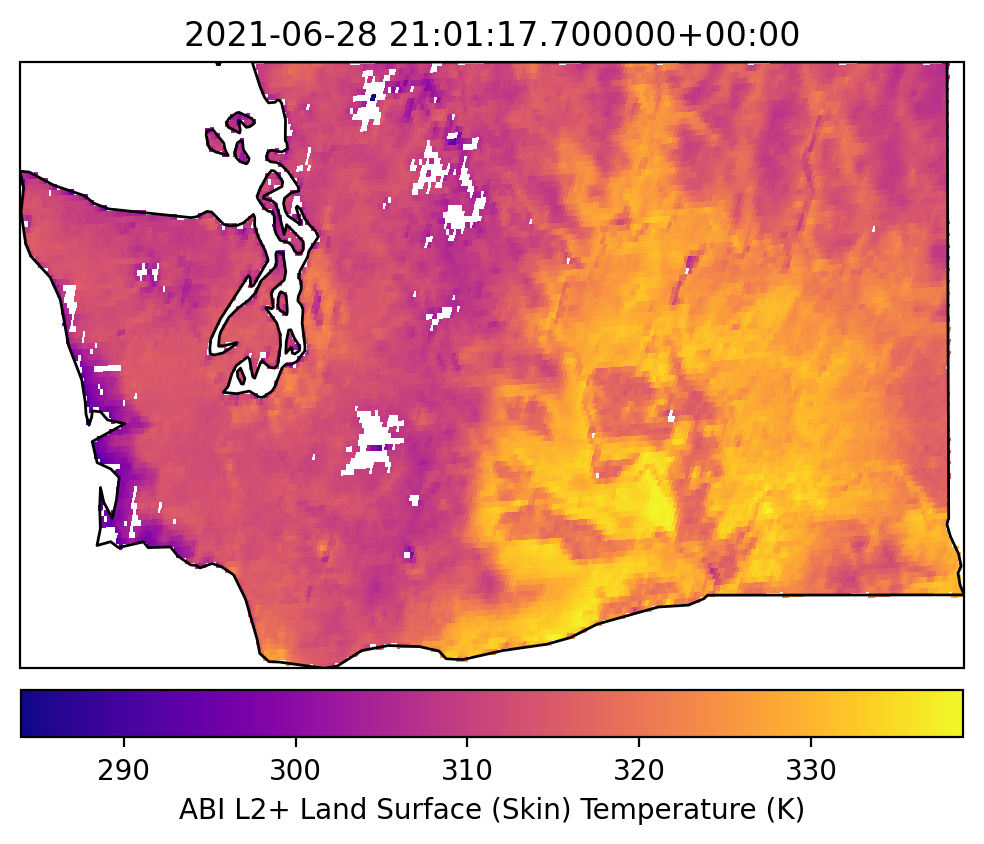

In [39]:
a,pc,_ = sps.plot('LST', show_features=False, shape = state,colorbar = False)
pc.set_cmap(plt.cm.plasma)
f = a.get_figure()
cb = f.colorbar(pc, orientation= 'horizontal', shrink = 0.95, pad = 0.03)
cb.set_label('ABI L2+ Land Surface (Skin) Temperature (K)')
a.set_title(pd.to_datetime(sps.ds.time_coverage_start))

In [ ]:
fn = '/home/grad/htelg/fundgrube/products_satellite_networks_etc/GML_sites/G-RAD/eco_climate_maps/na_cec_eco_l2/NA_CEC_Eco_Level2.shp'
shape = gpd.read_file(fn)
shape = shape.to_crs(epsg=4326)

In [72]:
eco = shape[shape.NA_L2CODE == '7.1']
eco = eco.clip(state)

In [102]:
eco

,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,NA_L2KEY,NA_L1KEY,Shape_Leng,Shape_Area,geometry
1040,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,4.749983e+04,4.849565e+07,"POLYGON ((-122.87017 47.25032, -122.87048 47.2..."
1031,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,5.017002e+04,2.161070e+07,"POLYGON ((-123.98387 46.48016, -123.98424 46.4..."
1039,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,3.532265e+03,7.506212e+05,"POLYGON ((-122.66977 47.33176, -122.66906 47.3..."
1042,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,3.018200e+03,3.266802e+05,"POLYGON ((-122.83017 47.33593, -122.83015 47.3..."
1043,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,7.972902e+04,9.656556e+07,"POLYGON ((-122.43809 47.44179, -122.43815 47.4..."
1045,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,6.544913e+04,7.552181e+07,"MULTIPOLYGON (((-122.53552 47.69807, -122.5356..."
1051,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,2.389367e+05,4.407661e+08,"POLYGON ((-122.58631 48.36625, -122.58682 48.3..."
1056,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,9.971639e+04,7.715296e+07,"MULTIPOLYGON (((-122.87535 48.54805, -122.8756..."
1064,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,1.116503e+05,1.436615e+08,"MULTIPOLYGON (((-123.10207 48.60289, -123.1027..."
1068,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,1.175943e+05,1.499198e+08,"MULTIPOLYGON (((-122.88395 48.66171, -122.8838..."


<AxesSubplot: >

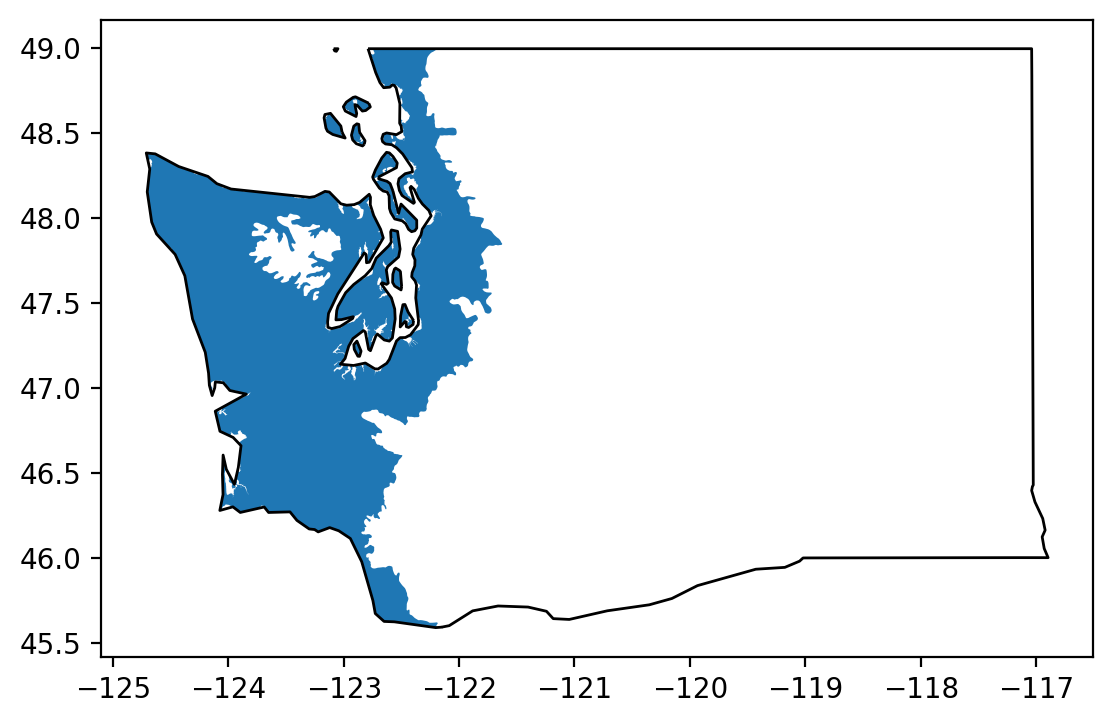

In [73]:
f,a = plt.subplots()
eco.plot(ax = a)
state.plot(ax = a, 
             color="None", )

In [74]:
spse = sps.project_on_shape(eco)

In [80]:
import cartopy

(-125.41862228729298,
 -116.47037174736597,
 45.48457970419321,
 49.08221760437881)

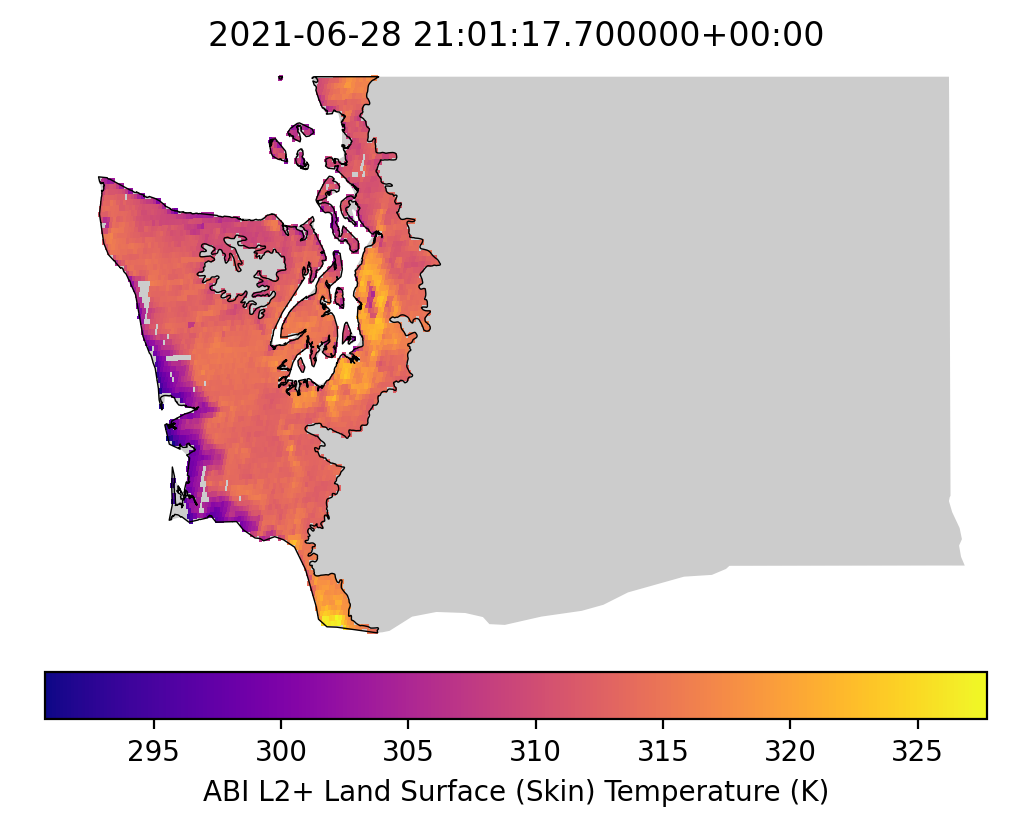

In [101]:
a,pc,_ = spse.plot('LST', show_features=False, 
                   # shape = state,
                   colorbar = False)
pc.set_cmap(plt.cm.plasma)
f = a.get_figure()
cb = f.colorbar(pc, orientation= 'horizontal', shrink = 0.95, pad = 0.03)
cb.set_label('ABI L2+ Land Surface (Skin) Temperature (K)')
a.set_title(pd.to_datetime(sps.ds.time_coverage_start))

state.plot(ax = a, color = '0.8', transform = cartopy.crs.PlateCarree(), zorder = 0)
eco.plot(ax = a, color = 'None', transform = cartopy.crs.PlateCarree(), zorder = 1, lw = 0.5)


a.axis('off')


# Download and process on the fly with `process` kwarg. Files will be discarded after processing